tiv to brain_volume

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load tiv data
cat12_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
cat12_df = pd.read_csv(cat12_path, sep='\t')
cat12_df = cat12_df[['participant_id', 'tiv']]

# Load brain volume data
volume_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"
vol_df = pd.read_csv(volume_path)
vol_df = vol_df[['participant_id', 'volume']]

# Merge dataframes
merged = pd.merge(cat12_df, vol_df, on='participant_id')

# Create plot
plt.figure(figsize=(8,6))
plt.scatter(merged['tiv'], merged['volume'], alpha=0.6)
plt.xlabel('tiv')
plt.ylabel('Brain Volume')
plt.title('tiv vs Brain Volume')
plt.grid(True)
plt.tight_layout()

# Save plot
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/tiv_vs_volume.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.close()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Load data ---
cat12_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
volume_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"

cat12_df = pd.read_csv(cat12_path, sep='\t')[['participant_id', 'tiv']]
vol_df = pd.read_csv(volume_path)[['participant_id', 'volume']]

# --- Merge and clean ---
merged = pd.merge(cat12_df, vol_df, on='participant_id')
merged = merged.dropna(subset=['tiv', 'volume'])

# --- Convert volume to cm³ ---
merged['volume_cm3'] = merged['volume'] / 1000.0

# --- Define inliers ---
inliers_mask = (merged['tiv'] > 1000) & (merged['tiv'] < 2200) & (merged['volume_cm3'] > 750)
merged['is_outlier'] = ~inliers_mask

# --- Extract outliers ---
outliers_df = merged[merged['is_outlier']]
print("Number of outliers:", len(outliers_df))
print(outliers_df[['participant_id', 'tiv', 'volume_cm3']])

# --- Save outlier IDs ---
outlier_csv_path = "outlier_subjects.csv"
outliers_df[['participant_id']].to_csv(outlier_csv_path, index=False)
print(f"Outlier IDs saved to: {outlier_csv_path}")

# --- Plot with outliers highlighted ---
plt.figure(figsize=(8, 6))
plt.scatter(merged['tiv'], merged['volume_cm3'], alpha=0.4, label='Inliers')
plt.scatter(outliers_df['tiv'], outliers_df['volume_cm3'], color='red', label='Outliers')
plt.xlabel('TIV')
plt.ylabel('Brain Volume (cm³)')
plt.title('TIV vs Brain Volume (UK Biobank)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- Save plot ---
plot_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/tiv_vs_volume_range_outliers_cm3.png"
os.makedirs(os.path.dirname(plot_path), exist_ok=True)
plt.savefig(plot_path)
plt.close()
print(f"Plot saved to: {plot_path}")


Number of outliers: 16
      participant_id          tiv  volume_cm3
3488     sub-4260654  2221.019286    1757.900
4433     sub-5001586  1300.178009     375.338
11715    sub-5963962  1605.109310     350.216
11815    sub-4030844  1758.299886     382.148
24379    sub-2927441  1617.650642     631.816
24380    sub-2927441  1600.348620     631.816
25763    sub-2437717   967.946100     797.360
26464    sub-1366082  1733.999089     365.847
26465    sub-1366082  1727.528906     365.847
31745    sub-1146029  1593.725643     271.545
33520    sub-1832571  2272.905737     674.615
34387    sub-3675637  1652.929216      98.405
34388    sub-3675637  1678.710603      98.405
34409    sub-3829981  1531.561130     383.378
38708    sub-3044755  1553.776282     223.760
46060    sub-5543692  2312.176115    1883.103
Outlier IDs saved to: outlier_subjects.csv
Plot saved to: /neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/tiv_vs_volume_range_outliers_cm3.png



 Merged DataFrame (first 10 rows):
  participant_id           tiv   Age     volume
0    sub-1067885  1.542818e+06  54.0  1267880.0
1    sub-1067885  1.608491e+06  54.0  1267880.0
2    sub-2062140  1.393934e+06  60.0  1050711.0
3    sub-4764923  1.509096e+06  49.0  1172766.0
4    sub-4917898  1.477424e+06  71.0  1193758.0
5    sub-4456687  1.633085e+06  74.0  1259659.0
6    sub-5339235  1.751935e+06  72.0        NaN
7    sub-4127142  1.703478e+06  49.0  1360969.0
8    sub-4127142  1.708797e+06  49.0  1360969.0
9    sub-4768713  1.317576e+06  68.0  1047218.0


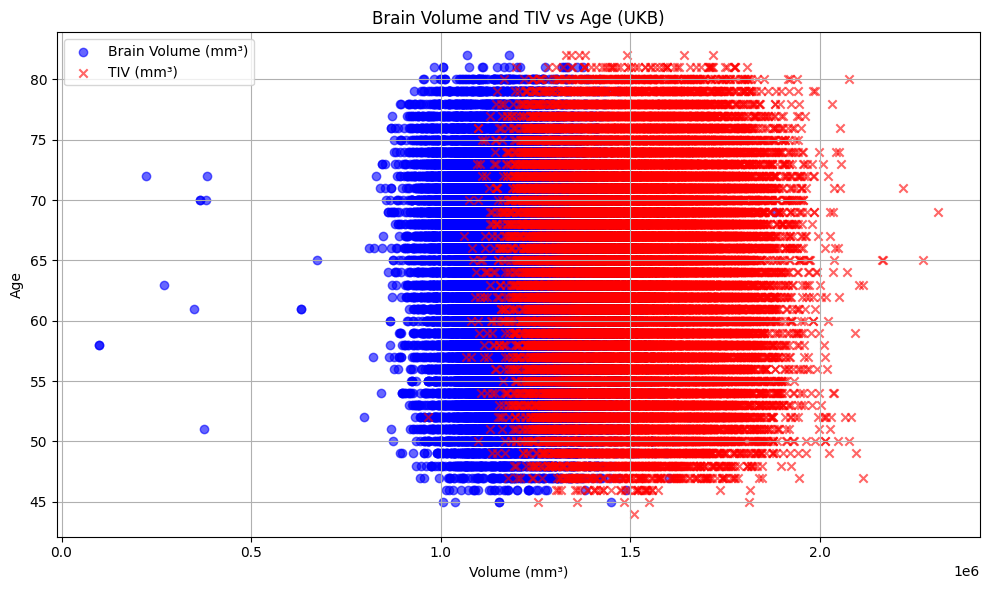

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths
tiv_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
volume_age_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"

# Load data
df_tiv = pd.read_csv(tiv_path, sep='\t')[['participant_id', 'tiv']]
df_meta = pd.read_csv(volume_age_path)[['participant_id', 'Age', 'volume']]

# Convert TIV from cm³ to mm³
df_tiv['tiv'] = df_tiv['tiv'] * 1000

# Merge on participant_id
df_merged = pd.merge(df_tiv, df_meta, on='participant_id')
df_merged.rename(columns={'age': 'Age'}, inplace=True)

# Print for verification
print("\n Merged DataFrame (first 10 rows):")
print(df_merged.head(10))

# Plot: Volume and TIV on X-axis, Age on Y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['volume'], df_merged['Age'], color='blue', alpha=0.6, label='Brain Volume (mm³)')
plt.scatter(df_merged['tiv'], df_merged['Age'], color='red', alpha=0.6, marker='x', label='TIV (mm³)')
plt.xlabel("Volume (mm³)")
plt.ylabel("Age")
plt.title("Brain Volume and TIV vs Age (UKB)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/volume_vs_age_plot.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.show()


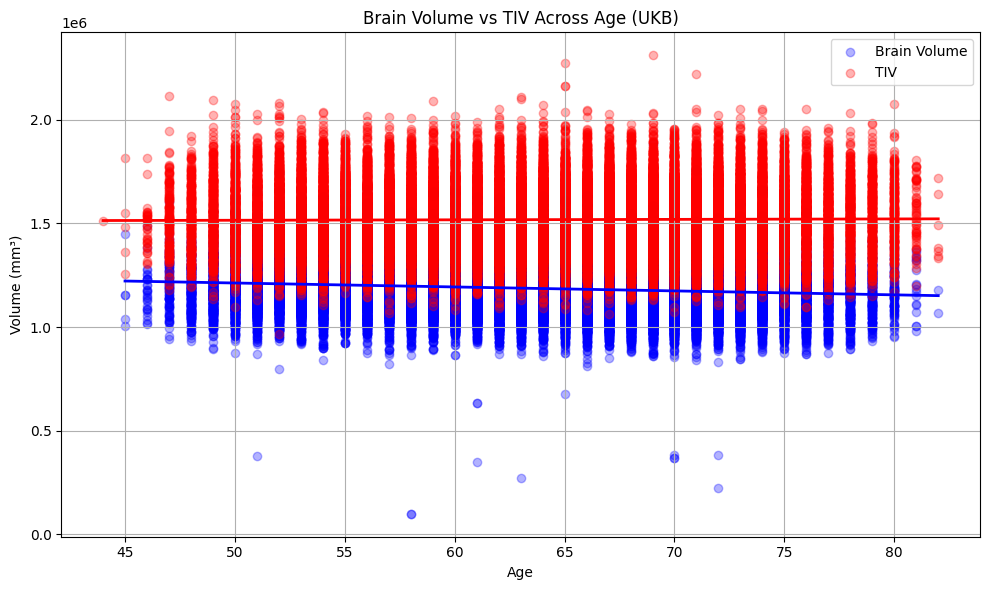

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File paths
tiv_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
meta_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age_volumes.csv"

# Load and merge
df_tiv = pd.read_csv(tiv_path, sep='\t')[['participant_id', 'tiv']]
df_tiv['tiv'] *= 1000  # convert to mm³

df_meta = pd.read_csv(meta_path)[['participant_id', 'Age', 'volume']]
df = pd.merge(df_tiv, df_meta, on='participant_id')
df.rename(columns={'age': 'Age'}, inplace=True)

# Reshape for seaborn
df_long = pd.melt(df, id_vars=["Age"], value_vars=["volume", "tiv"],
                  var_name="Type", value_name="Volume")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_long[df_long["Type"] == "volume"], x="Age", y="Volume", label="Brain Volume", color="blue", scatter_kws={'alpha':0.3}, line_kws={"linewidth":2})
sns.regplot(data=df_long[df_long["Type"] == "tiv"], x="Age", y="Volume", label="TIV", color="red", scatter_kws={'alpha':0.3}, line_kws={"linewidth":2})

plt.xlabel("Age")
plt.ylabel("Volume (mm³)")
plt.title("Brain Volume vs TIV Across Age (UKB)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Program/2023_jlaval_STSbabies/abdelghani_figures/tiv_vs_brain_volume_regression.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.show()


In [22]:
import pandas as pd

# Load the TSV file
file_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
df = pd.read_csv(file_path, sep='\t')

# Display the column names to check what TIV is called exactly
print(df.columns)

# Extract only participant_id and TIV
# Adjust column name below if needed (e.g., it might be 'TIV (ml)' or similar)
new_df = df[['participant_id', 'tiv']]

# Save the new dataframe to a file (optional)
new_df.to_csv("participant_tiv.csv", index=False)

# Or just display it
print(new_df.head())


Index(['Unnamed: 0', 'participant_id', 'session', 'run', 'tiv', 'CSF_Vol',
       'GM_Vol', 'WM_Vol', 'l3thVen_GM_Vol', 'l3thVen_CSF_Vol',
       ...
       'rTemPo_GM_Vol', 'rTemPo_CSF_Vol', 'lInfFroAngGy_GM_Vol',
       'lInfFroAngGy_CSF_Vol', 'rInfFroAngGy_GM_Vol', 'rInfFroAngGy_CSF_Vol',
       'lTemTraGy_GM_Vol', 'lTemTraGy_CSF_Vol', 'rTemTraGy_GM_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=292)
  participant_id          tiv
0    sub-1067885  1542.818347
1    sub-1067885  1608.490912
2    sub-2062140  1393.933669
3    sub-4764923  1509.095989
4    sub-4917898  1477.424183


In [23]:
import pandas as pd

# Load the TSV file
file_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_cat12vbm-roi/cat12_vbm_roi.tsv"
df = pd.read_csv(file_path, sep='\t')

# Convert TIV to mm³ assuming it's in mL
df['tiv_mm3'] = df['tiv'] * 1000

# Create new DataFrame with renamed column
new_df = df[['participant_id', 'tiv_mm3']].rename(columns={'tiv_mm3': 'volume'})

# Save to specified path
output_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes.csv"
new_df.to_csv(output_path, index=False)

# Confirm
print(f"Saved file to: {output_path}")


Saved file to: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes.csv


In [25]:
import pandas as pd
import numpy as np
from kernels import KernelMetric  # make sure this is correct

# Load your dataset
csv_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes.csv"
df = pd.read_csv(csv_path)

# Drop NaNs from volume
df = df.dropna(subset=["volume"])

# Keep original values before normalization
df = df.rename(columns={"volume": "tiv"})

# Z-score normalization
mean = df["tiv"].mean()
std = df["tiv"].std(ddof=0)  # population std
df["volume"] = (df["tiv"] - mean) / std

# Save to new CSV
output_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv"
df.to_csv(output_path, index=False)

print(f"Normalized volumes saved to: {output_path}")


Normalized volumes saved to: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# === Define root path ===
root_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/"

# === Define file paths ===
tiv_path = os.path.join(root_path, "participants_tiv_volumes_normalized.csv")
demo_path = os.path.join(root_path, "participants_sex_age_volumes_normalized.csv")

# === Load CSV files ===
df_tiv = pd.read_csv(tiv_path)
df_demo = pd.read_csv(demo_path)

# === Standardize column names ===
df_tiv.columns = df_tiv.columns.str.strip().str.lower()
df_demo.columns = df_demo.columns.str.strip().str.lower()

# === Remove duplicates ===
df_tiv = df_tiv.drop_duplicates(subset="participant_id")
df_demo = df_demo.drop_duplicates(subset="participant_id")

# === Remove NaNs from TIV only
df_tiv = df_tiv.dropna(subset=["tiv"])

# === Save cleaned TIV file ===
df_tiv.to_csv(tiv_path, index=False)
print(f"✅ Cleaned and saved: {tiv_path}")
print(f"🧮 Total unique participants in TIV file: {len(df_tiv)}")

# === Merge both files (only keep participants present in both) ===
df = pd.merge(df_demo, df_tiv, on="participant_id", how="inner")
print(f"🔗 Participants after merge: {len(df)}")

# === Drop rows missing any stratification data ===
df = df.dropna(subset=["age", "sex", "tiv"])
print(f"🧹 After dropping NaNs in sex/age/tiv: {len(df)}")

# === Bin Age and TIV for stratification ===
df['age_bin'] = pd.cut(df['age'], bins=5, labels=False)
df['tiv_bin'] = pd.qcut(df['tiv'], q=5, labels=False, duplicates='drop')

# === Create stratification key from sex + age + tiv ===
df['stratify_key'] = (
    df['sex'].astype(str) + "_" +
    df['age_bin'].astype(str) + "_" +
    df['tiv_bin'].astype(str)
)

# === First split: Train (80%) vs Temp (20%) ===
df_train, df_temp = train_test_split(
    df,
    test_size=0.2,
    stratify=df['stratify_key'],
    random_state=42
)

# === Second split: Validation (10%) vs Test (10%) ===
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['stratify_key'],
    random_state=42
)

# === Show distribution summary ===
def display_distribution(name, data):
    print(f"\n📊 Distribution in {name} set:")
    print("Sex distribution:\n", data['sex'].value_counts(normalize=True).round(3))
    print("Age summary:\n", data['age'].describe().round(2))
    print("TIV summary:\n", data['tiv'].describe().round(2))

display_distribution("Train", df_train)
display_distribution("Validation", df_val)
display_distribution("Test", df_test)

# === Save only participant_id columns ===
save_dir = os.path.join(root_path, "crops/2mm/LARGE_CINGULATE./mask/")
os.makedirs(save_dir, exist_ok=True)

df_train[['participant_id']].to_csv(os.path.join(save_dir, "tiv_subjects_train.csv"), index=False)
df_val[['participant_id']].to_csv(os.path.join(save_dir, "tiv_subjects_val.csv"), index=False)
df_test[['participant_id']].to_csv(os.path.join(save_dir, "tiv_subjects_test.csv"), index=False)

# === Final check ===
split_total = len(df_train) + len(df_val) + len(df_test)
print("\n✅ Stratified splits saved successfully.")
print(f"📦 Total rows after split: {split_total}")
print(f"📂 Rows in cleaned TIV file: {len(df_tiv)}")
print(f"🔗 Rows after merge (with demo): {len(df)}")
assert split_total == len(df), "❌ Split sizes do not match total usable participants!"


✅ Cleaned and saved: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv
🧮 Total unique participants in TIV file: 42931
🔗 Participants after merge: 42786
🧹 After dropping NaNs in sex/age/tiv: 42786

📊 Distribution in Train set:
Sex distribution:
 sex
0    0.528
1    0.472
Name: proportion, dtype: float64
Age summary:
 count    34228.00
mean        63.97
std          7.69
min         44.00
25%         58.00
50%         64.00
75%         70.00
max         82.00
Name: age, dtype: float64
TIV summary:
 count      34228.00
mean     1518181.54
std       149599.22
min       967946.10
25%      1407433.12
50%      1510754.19
75%      1621417.75
max      2312176.12
Name: tiv, dtype: float64

📊 Distribution in Validation set:
Sex distribution:
 sex
0    0.528
1    0.472
Name: proportion, dtype: float64
Age summary:
 count    4279.00
mean       63.96
std         7.71
min        46.00
25%        58.00
50%        64.00
75%        70.00
max        82

In [5]:
import pandas as pd

# Path to your file
file_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv"

# Load and standardize column names
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()

# Drop rows with missing TIV
df = df.dropna(subset=["tiv"])

# Drop duplicate participant_id entries (keep the first)
df = df.drop_duplicates(subset="participant_id", keep="first")

# Save cleaned file
cleaned_path = file_path.replace(".csv", "_cleaned.csv")
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned file saved to: {cleaned_path}")
print(f"🧮 Final number of participants: {len(df)}")


✅ Cleaned file saved to: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized_cleaned.csv
🧮 Final number of participants: 42931


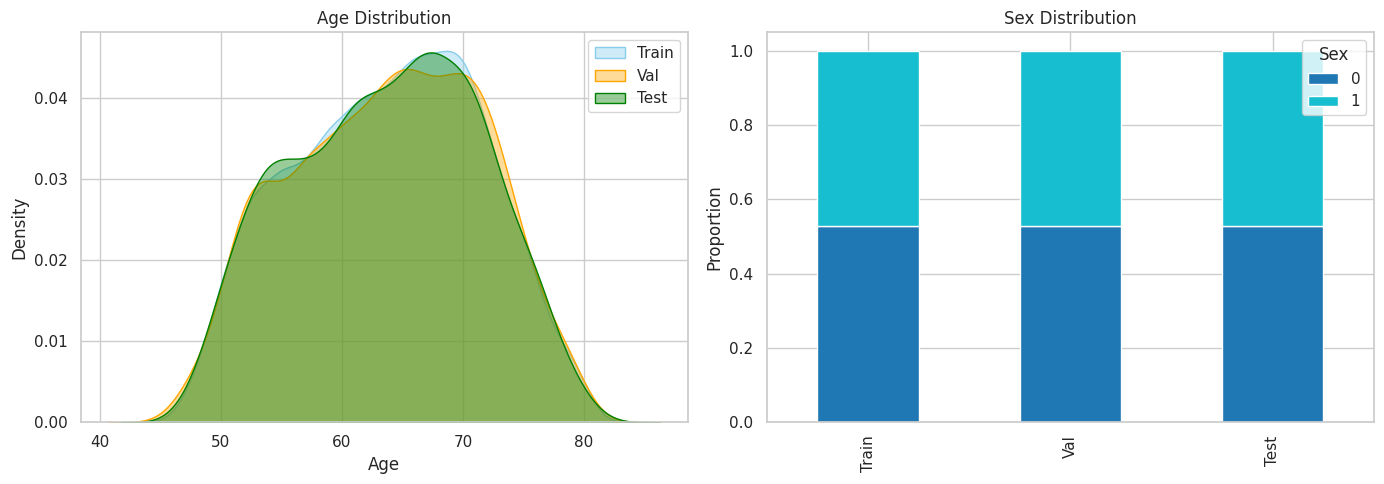

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ----- AGE KDE PLOT -----
for data, label, color in zip(
    [df_train, df_val, df_test],
    ["Train", "Val", "Test"],
    ["skyblue", "orange", "green"]
):
    sns.kdeplot(data['Age'], fill=True, ax=axes[0], label=label, color=color, alpha=0.4)

axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Density")
axes[0].legend()

# ----- SEX STACKED BAR PLOT -----
sex_dist = pd.DataFrame({
    'Train': df_train['Sex'].value_counts(normalize=True),
    'Val': df_val['Sex'].value_counts(normalize=True),
    'Test': df_test['Sex'].value_counts(normalize=True)
}).T

# Ensure columns are sorted by sex value (0 then 1)
sex_dist = sex_dist[[0, 1]] if 0 in sex_dist.columns else sex_dist

sex_dist.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab10')
axes[1].set_title("Sex Distribution")
axes[1].set_ylabel("Proportion")
axes[1].legend(title="Sex")

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import os
from scipy.stats import zscore

# === Path to your file ===
filepath = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv"

# === Load data ===
df = pd.read_csv(filepath)

# === Standardize column names ===
df.columns = df.columns.str.strip().str.lower()

# === Find the volume column (excluding participant_id and tiv) ===
volume_col = [col for col in df.columns if col not in ['participant_id', 'tiv']]
if len(volume_col) != 1:
    raise ValueError(f"Expected exactly one volume column, found: {volume_col}")
volume_col = volume_col[0]

# === Convert columns to numeric ===
df['tiv'] = pd.to_numeric(df['tiv'], errors='coerce')
df[volume_col] = pd.to_numeric(df[volume_col], errors='coerce')

# === Z-score tiv and keep its name ===
df['tiv'] = zscore(df['tiv'], nan_policy='omit')

# === Keep only the desired columns ===
df_clean = df[['participant_id', 'tiv', volume_col]]

# === Save the cleaned file ===
output_path = os.path.splitext(filepath)[0] + '_cleaned.csv'
df_clean.to_csv(output_path, index=False)

print(f"✅ Cleaned file saved to: {output_path}")

# === Statistics summary ===
print("\n📊 Statistics Summary:\n")
stats_summary = df_clean.describe().T
stats_summary['median'] = df_clean[['tiv', volume_col]].median()
stats_summary['missing_values'] = df_clean[['tiv', volume_col]].isna().sum()

print(stats_summary[['mean', 'std', 'min', '25%', 'median', '75%', 'max', 'missing_values']])


✅ Cleaned file saved to: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized_cleaned.csv

📊 Statistics Summary:

                mean       std       min       25%    median       75%  \
tiv     1.832438e-15  1.000011 -3.675953 -0.740489 -0.050377  0.685499   
volume  1.832588e-15  1.000011 -3.675953 -0.740489 -0.050377  0.685499   

             max  missing_values  
tiv     5.298317               0  
volume  5.298317               0  


In [22]:
# Save original mean and std
tiv_mean = df['tiv'].mean()
tiv_std = df['tiv'].std()

print(f"📏 Original TIV mean: {tiv_mean:.2f}")
print(f"📐 Original TIV std:  {tiv_std:.2f}")


📏 Original TIV mean: 0.00
📐 Original TIV std:  1.00


In [ ]:
import pandas as pd
import os

# === List of files ===
files = [
    "tiv_subjects_train.csv",
    "tiv_subjects_val.csv",
    "tiv_subjects_test.csv"
]

# === Path to your folder ===
base_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/crops/2mm/LARGE_CINGULATE./mask/"

for filename in files:
    filepath = os.path.join(base_path, filename)
    
    # Load and keep only the participant_id column
    df = pd.read_csv(filepath)
    df = df[['participant_id']]  # Keep only this column

    # Overwrite the file or save with _filtered suffix
    output_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/crops/2mm/LARGE_CINGULATE./mask/"
    df.to_csv(output_path, index=False)

    print(f"Saved: {output_path}")


IsADirectoryError: [Errno 21] Is a directory: '/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/'

In [10]:
import pandas as pd
import os

# === Input file ===
input_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized.csv"

# === Output file ===
output_path = input_path.replace(".csv", "_nodeduplicated.csv")

# === Load data ===
df = pd.read_csv(input_path)

# === Clean column names (just in case) ===
df.columns = df.columns.str.strip().str.lower()

# === Remove duplicates based on participant_id ===
before = len(df)
df_clean = df.drop_duplicates(subset="participant_id", keep="first")
after = len(df_clean)

# === Save cleaned file ===
df_clean.to_csv(output_path, index=False)

# === Report ===
print(f"✅ Saved cleaned file: {output_path}")
print(f"🧮 Removed {before - after} duplicates (kept {after} rows).")


✅ Saved cleaned file: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes_normalized_nodeduplicated.csv
🧮 Removed 0 duplicates (kept 42931 rows).
